In [3]:
import json
import os 
import numpy as np
from matplotlib import pyplot as plt

!git clone https://github.com/sinc-lab/lncRNA-folding
os.chdir("lncRNA-folding/methods/")

In [2]:
computation_time = {}
lengths = None
for method_file in os.listdir("./"): 
    if "ipynb" in method_file and not(method_file=="RNAfold_with_constraints.ipynb"):
        method = method_file.split(".")[0]
        
        
        computation_time[method] = np.zeros(18)*np.nan
        text = json.load(open(method_file))["cells"][-1]["outputs"][0]["text"]

        if lengths is None:
            lengths = [int(text[k + 1].split("\t")[2]) for k in range(18)]

        for k in range(18):
            if "Structure cannot be computed" in text[k+1]:
                break
            computation_time[method][k] = float(text[k+1].split("\t")[-1].strip("s\n"))
       


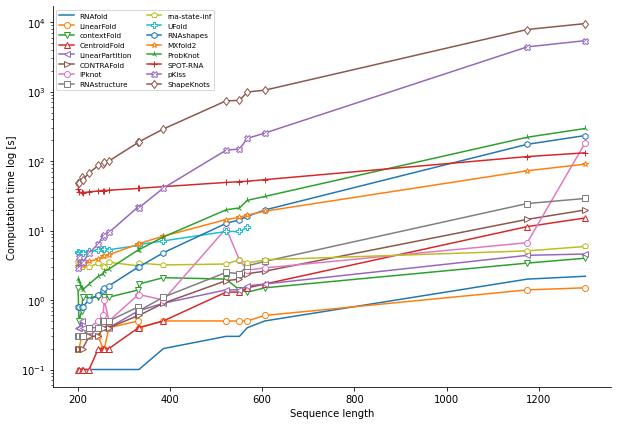

In [4]:
methods = np.array([method for method in computation_time])
mean_cost = [computation_time[method][14] for method in methods]
methods = methods[np.argsort(mean_cost)]

fig, ax = plt.subplots(figsize=(10, 7))

markers = ["", "o", "v", "^", "<", ">", "8", "s", "p", "P", "h", "*", "2", "+", "X", "d"]

for k, method in enumerate(methods):
    marker = markers[k]+"-"
    plt.plot(lengths, computation_time[method], marker, markersize=6, markerfacecolor="white", label=method)

plt.xlabel("Sequence length")
plt.ylabel("Computation time log [s]")
plt.yscale("log")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.legend(prop={'size': 7.3}, ncol=2)
os.chdir("../../")
plt.savefig("computation-time1.pdf")